In [27]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Вызов библиотек                                                                       #
#------------------------------------------------------------------------------------------------------------------------------#

import numpy as np
import matplotlib as mb
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import scipy as sp
from scipy import stats

In [42]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Загрузка датафрейма для США                                                                   #
#------------------------------------------------------------------------------------------------------------------------------#


dataset_US = pd.read_csv(r"C:\Users\peter\OneDrive\Документы\ВКР\ВКР работа\Dataset_USA.csv", delimiter = ';', decimal = ',')
dataset_US = pd.DataFrame(dataset_US)
dataset_US

,Date,Overall Traded volume USA -dollars,PartRate,Retail volumes -dollars,Retail volumes -billion dollars,ln (Retail volumes),VIX,Unemployment rate,Index Return,Fin Literacy,...,After Capital Gain tax,After Capital Gain tax total,Dividends monthly,Dividend tax,After Dividend tax,Total Gain,Comission (for trading),Comissions paid,Comissions paid total,Cost To Trade total
0,01.02.2021,1.135068e+13,"19,50%",2.213382e+12,2213.38,7.70,30.24,0.06,0.02,1.0,...,56.418827,56.418827,4.0,0.88,3.12,59.538827,"0,00%",0.000000,0.000000,57.298827
1,04.01.2021,1.179530e+13,"19,50%",2.300083e+12,2300.08,7.74,26.97,0.06,0.01,1.0,...,29.883334,29.883334,4.0,0.88,3.12,33.003334,"0,00%",0.000000,0.000000,30.763334
2,01.12.2020,1.091668e+13,"19,50%",2.128752e+12,2128.75,7.66,20.77,0.07,0.10,1.0,...,291.201489,291.201489,4.0,0.88,3.12,294.321489,"0,00%",0.000000,0.000000,292.081489
3,02.11.2020,1.026411e+13,"19,50%",2.001501e+12,2001.50,7.60,37.13,0.07,-0.02,1.0,...,-60.744020,0.000000,4.0,0.88,3.12,-57.624020,"0,00%",0.000000,0.000000,0.880000
4,01.10.2020,9.523329e+12,"19,50%",1.857049e+12,1857.05,7.53,26.70,0.07,-0.04,1.0,...,-121.639807,0.000000,4.0,0.88,3.12,-118.519807,"0,00%",0.000000,0.000000,0.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,01.05.2013,5.049741e+12,"12,00%",6.059689e+11,605.97,6.41,14.49,0.08,0.01,0.0,...,37.602343,37.602343,4.0,0.76,3.24,40.842343,"5,00%",2.042117,2.042117,40.404460
94,01.04.2013,4.980839e+12,"12,00%",5.977007e+11,597.70,6.39,13.58,0.08,0.03,0.0,...,82.225318,82.225318,4.0,0.76,3.24,85.465318,"5,00%",4.273266,4.273266,87.258584
95,01.03.2013,4.205203e+12,"12,00%",5.046243e+11,504.62,6.22,15.36,0.08,0.00,0.0,...,9.557668,9.557668,4.0,0.76,3.24,12.797668,"5,00%",0.639883,0.639883,10.957551
96,01.02.2013,4.339547e+12,"12,00%",5.207456e+11,520.75,6.26,12.90,0.08,0.03,0.0,...,98.248868,98.248868,4.0,0.76,3.24,101.488868,"5,00%",5.074443,5.074443,104.083311


In [43]:
dataset_US = dataset_US.drop (dataset_US.tail (1) .index)
dataset_US

,Date,Overall Traded volume USA -dollars,PartRate,Retail volumes -dollars,Retail volumes -billion dollars,ln (Retail volumes),VIX,Unemployment rate,Index Return,Fin Literacy,...,After Capital Gain tax,After Capital Gain tax total,Dividends monthly,Dividend tax,After Dividend tax,Total Gain,Comission (for trading),Comissions paid,Comissions paid total,Cost To Trade total
0,01.02.2021,1.135068e+13,"19,50%",2.213382e+12,2213.38,7.70,30.24,0.06,0.02,1.0,...,56.418827,56.418827,4.0,0.88,3.12,59.538827,"0,00%",0.000000,0.000000,57.298827
1,04.01.2021,1.179530e+13,"19,50%",2.300083e+12,2300.08,7.74,26.97,0.06,0.01,1.0,...,29.883334,29.883334,4.0,0.88,3.12,33.003334,"0,00%",0.000000,0.000000,30.763334
2,01.12.2020,1.091668e+13,"19,50%",2.128752e+12,2128.75,7.66,20.77,0.07,0.10,1.0,...,291.201489,291.201489,4.0,0.88,3.12,294.321489,"0,00%",0.000000,0.000000,292.081489
3,02.11.2020,1.026411e+13,"19,50%",2.001501e+12,2001.50,7.60,37.13,0.07,-0.02,1.0,...,-60.744020,0.000000,4.0,0.88,3.12,-57.624020,"0,00%",0.000000,0.000000,0.880000
4,01.10.2020,9.523329e+12,"19,50%",1.857049e+12,1857.05,7.53,26.70,0.07,-0.04,1.0,...,-121.639807,0.000000,4.0,0.88,3.12,-118.519807,"0,00%",0.000000,0.000000,0.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,03.06.2013,5.077340e+12,"12,00%",6.092808e+11,609.28,6.41,16.28,0.08,0.04,0.0,...,103.161765,103.161765,4.0,0.76,3.24,106.401765,"5,00%",5.320088,5.320088,109.241853
93,01.05.2013,5.049741e+12,"12,00%",6.059689e+11,605.97,6.41,14.49,0.08,0.01,0.0,...,37.602343,37.602343,4.0,0.76,3.24,40.842343,"5,00%",2.042117,2.042117,40.404460
94,01.04.2013,4.980839e+12,"12,00%",5.977007e+11,597.70,6.39,13.58,0.08,0.03,0.0,...,82.225318,82.225318,4.0,0.76,3.24,85.465318,"5,00%",4.273266,4.273266,87.258584
95,01.03.2013,4.205203e+12,"12,00%",5.046243e+11,504.62,6.22,15.36,0.08,0.00,0.0,...,9.557668,9.557668,4.0,0.76,3.24,12.797668,"5,00%",0.639883,0.639883,10.957551


In [44]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Декларирования переменных                                                                 #
#------------------------------------------------------------------------------------------------------------------------------#

Cost_to_trade = dataset_US["Cost To Trade total"]
Fin_lit = dataset_US["Fin Literacy"]
Infl = dataset_US["Infl"]
Int_rate = dataset_US["Int rate"]
Deriv = dataset_US["Der Turnover"]
GDP = dataset_US["GDP growth"]
Marg_Trade = dataset_US["Marginal Trading"]
Return = dataset_US["Index Return"]
Unempl = dataset_US["Unemployment rate"]
VIX = dataset_US["VIX"]
ln_retail_volumes = dataset_US["ln (Retail volumes)"]

In [45]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Создание датасета для США                                                                   #
#------------------------------------------------------------------------------------------------------------------------------#

series_1 = pd.Series([ln_retail_volumes, Return, Unempl, VIX, Marg_Trade, GDP, Deriv, Infl, Int_rate, Fin_lit, Cost_to_trade])
series_1

0     0     7.70
1     7.74
2     7.66
3     7.60
4 ...
1     0     0.02
1     0.01
2     0.10
3    -0.02
4 ...
2     0     0.06
1     0.06
2     0.07
3     0.07
4 ...
3     0     30.24
1     26.97
2     20.77
3     37.1...
4     0     1.0
1     1.0
2     1.0
3     1.0
4     ...
5     0     0.065
1     0.065
2     0.043
3     0.04...
6     0     2894627.0
1     2894627.0
2     2696624....
7     0     0.0043
1     0.0055
2     0.0009
3    -0...
8     0     0.0007
1     0.0008
2     0.0009
3     0...
9     0     1.0
1     1.0
2     1.0
3     1.0
4     ...
10    0      57.298827
1      30.763334
2     292.08...
dtype: object

In [46]:
frame_1 = {'ln_retail_volumes' : ln_retail_volumes, 'VIX' : VIX, 'Cost_to_trade' : Cost_to_trade, 'Unempl' : Unempl, 
        'GDP' : GDP, 'Fin_lit' : Fin_lit, 'Marg_Trade' : Marg_Trade, 'Return' : Return, 'Infl' : Infl, 'Int_rate' : Int_rate,
         'Deriv' : Deriv}
new_data_US = pd.DataFrame(frame_1)
new_data_US

,ln_retail_volumes,VIX,Cost_to_trade,Unempl,GDP,Fin_lit,Marg_Trade,Return,Infl,Int_rate,Deriv
0,7.70,30.24,57.298827,0.06,0.065,1.0,1.0,0.02,0.0043,0.0007,2894627.0
1,7.74,26.97,30.763334,0.06,0.065,1.0,1.0,0.01,0.0055,0.0008,2894627.0
2,7.66,20.77,292.081489,0.07,0.043,1.0,1.0,0.10,0.0009,0.0009,2696624.0
3,7.60,37.13,0.880000,0.07,0.043,1.0,1.0,-0.02,-0.0006,0.0009,2879377.0
4,7.53,26.70,0.880000,0.07,0.043,1.0,1.0,-0.04,0.0004,0.0009,2203521.0
...,...,...,...,...,...,...,...,...,...,...,...
92,6.41,16.28,109.241853,0.08,0.005,0.0,0.0,0.04,0.0024,0.0009,3082222.0
93,6.41,14.49,40.404460,0.08,0.005,0.0,0.0,0.01,0.0018,0.0009,2643380.0
94,6.39,13.58,87.258584,0.08,0.005,0.0,0.0,0.03,-0.0010,0.0011,2568009.0
95,6.22,15.36,10.957551,0.08,0.036,0.0,0.0,0.00,0.0026,0.0015,3351551.0


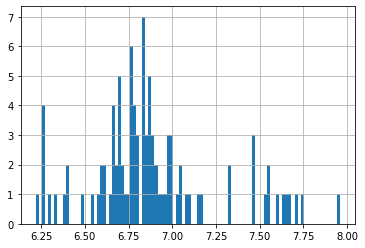

In [48]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Построение гистограмм для переменных                                                               #
#------------------------------------------------------------------------------------------------------------------------------#


new_data_US['ln_retail_volumes'].hist(bins=100)

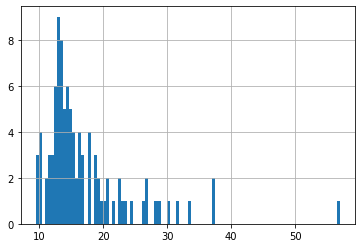

In [49]:
new_data_US['VIX'].hist(bins=100)

In [50]:
ln_VIX = np.log(VIX)

0     3.409166
1     3.294725
2     3.033510
3     3.614425
4     3.284664
        ...   
92    2.789937
93    2.673459
94    2.608598
95    2.731767
96    2.557227
Name: VIX, Length: 97, dtype: float64

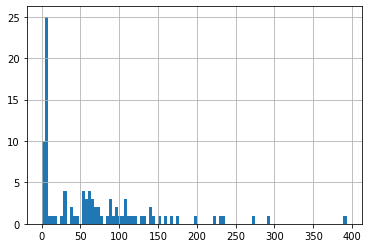

In [51]:
new_data_US['Cost_to_trade'].hist(bins=100)

In [52]:
ln_Cost_to_trade = np.log(Cost_to_trade)

0     4.048280
1     3.426324
2     5.677033
3    -0.127833
4    -0.127833
        ...   
92    4.693564
93    3.698940
94    4.468876
95    2.394029
96    4.645192
Name: Cost To Trade total, Length: 97, dtype: float64

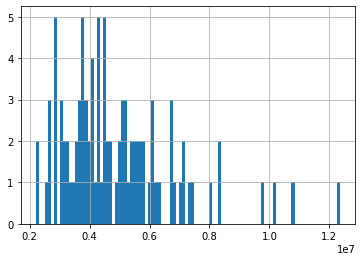

In [53]:
new_data_US['Deriv'].hist(bins=100)

In [54]:
ln_Deriv = np.log(Deriv)

0     14.878367
1     14.878367
2     14.807511
3     14.873085
4     14.605567
        ...    
92    14.941161
93    14.787569
94    14.758641
95    15.024934
96    14.810472
Name: Der Turnover, Length: 97, dtype: float64

In [55]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Датасет для США с логарифмическими преобразованиями                                                                 #
#------------------------------------------------------------------------------------------------------------------------------#


new_data_US['ln_Deriv'] = ln_Deriv
new_data_US['ln_Cost_to_trade'] = ln_Cost_to_trade
new_data_US['ln_VIX'] = ln_VIX
new_data_US

,ln_retail_volumes,VIX,Cost_to_trade,Unempl,GDP,Fin_lit,Marg_Trade,Return,Infl,Int_rate,Deriv,ln_Deriv,ln_Cost_to_trade,ln_VIX
0,7.70,30.24,57.298827,0.06,0.065,1.0,1.0,0.02,0.0043,0.0007,2894627.0,14.878367,4.048280,3.409166
1,7.74,26.97,30.763334,0.06,0.065,1.0,1.0,0.01,0.0055,0.0008,2894627.0,14.878367,3.426324,3.294725
2,7.66,20.77,292.081489,0.07,0.043,1.0,1.0,0.10,0.0009,0.0009,2696624.0,14.807511,5.677033,3.033510
3,7.60,37.13,0.880000,0.07,0.043,1.0,1.0,-0.02,-0.0006,0.0009,2879377.0,14.873085,-0.127833,3.614425
4,7.53,26.70,0.880000,0.07,0.043,1.0,1.0,-0.04,0.0004,0.0009,2203521.0,14.605567,-0.127833,3.284664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,6.41,16.28,109.241853,0.08,0.005,0.0,0.0,0.04,0.0024,0.0009,3082222.0,14.941161,4.693564,2.789937
93,6.41,14.49,40.404460,0.08,0.005,0.0,0.0,0.01,0.0018,0.0009,2643380.0,14.787569,3.698940,2.673459
94,6.39,13.58,87.258584,0.08,0.005,0.0,0.0,0.03,-0.0010,0.0011,2568009.0,14.758641,4.468876,2.608598
95,6.22,15.36,10.957551,0.08,0.036,0.0,0.0,0.00,0.0026,0.0015,3351551.0,15.024934,2.394029,2.731767


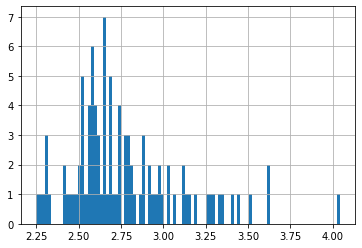

In [56]:
new_data_US['ln_VIX'].hist(bins=100)

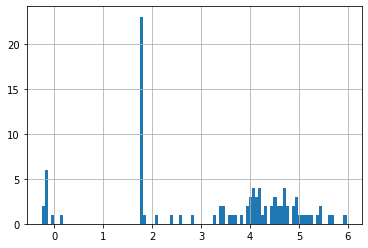

In [57]:
new_data_US['ln_Cost_to_trade'].hist(bins=100)

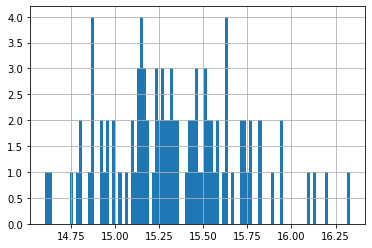

In [58]:
new_data_US['ln_Deriv'].hist(bins=100)

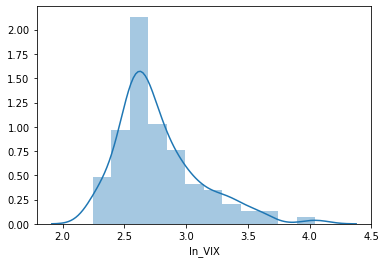

In [59]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Визуальный анализ распределения переменных                                                                   #
#------------------------------------------------------------------------------------------------------------------------------#


sns_plot = sns.distplot(new_data_US['ln_VIX'])
fig = sns_plot.get_figure()

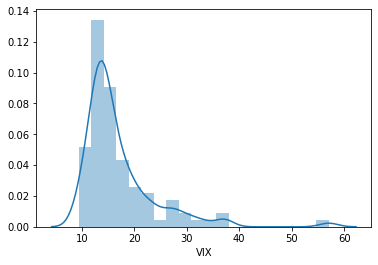

In [60]:
sns_plot = sns.distplot(new_data_US['VIX'])
fig = sns_plot.get_figure()

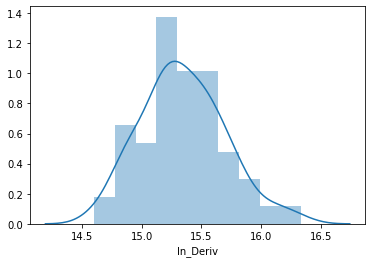

In [61]:
sns_plot = sns.distplot(new_data_US['ln_Deriv'])
fig = sns_plot.get_figure()

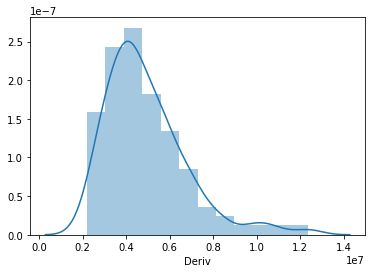

In [62]:
sns_plot = sns.distplot(new_data_US['Deriv'])
fig = sns_plot.get_figure()

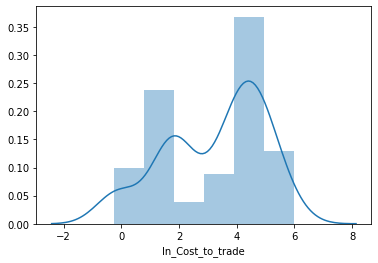

In [63]:
sns_plot = sns.distplot(new_data_US['ln_Cost_to_trade'])
fig = sns_plot.get_figure()

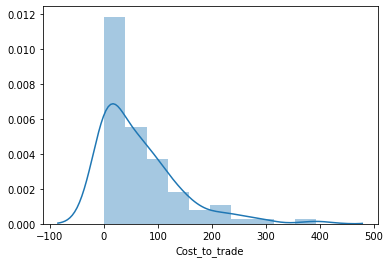

In [64]:
sns_plot = sns.distplot(new_data_US['Cost_to_trade'])
fig = sns_plot.get_figure()

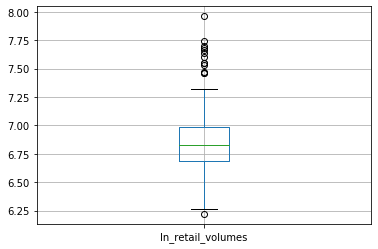

In [65]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Выявление выбросов                                                                    #
#------------------------------------------------------------------------------------------------------------------------------#


new_data_US.boxplot(column=['ln_retail_volumes'])

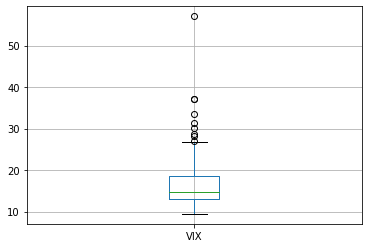

In [429]:
new_data_US.boxplot(column=['VIX'])

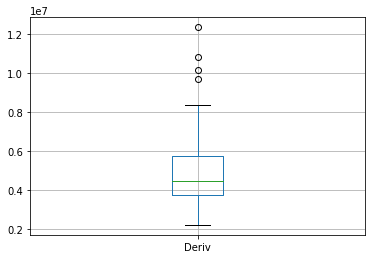

In [430]:
new_data_US.boxplot(column=['Deriv'])

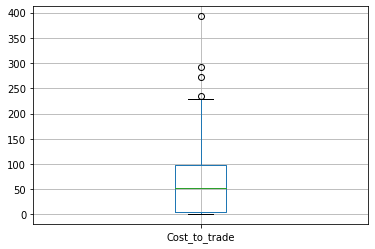

In [431]:
new_data_US.boxplot(column=['Cost_to_trade'])

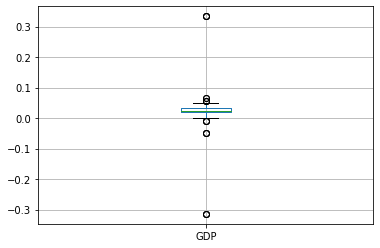

In [69]:
new_data_US.boxplot(column=['GDP'])

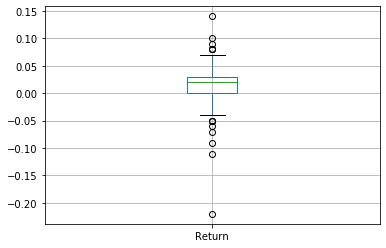

In [70]:
new_data_US.boxplot(column=['Return'])

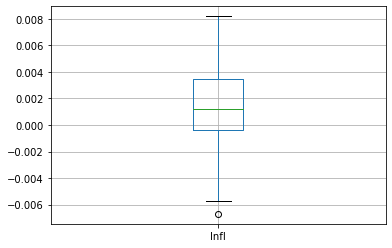

In [71]:
new_data_US.boxplot(column=['Infl'])

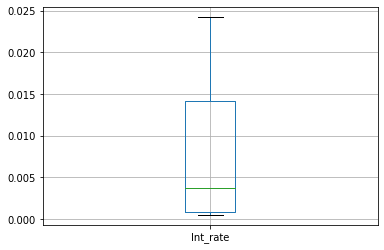

In [72]:
new_data_US.boxplot(column=['Int_rate'])

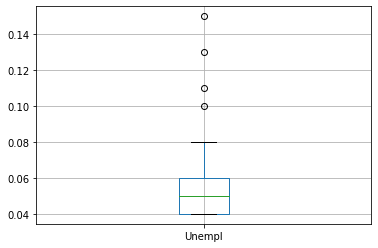

In [73]:
new_data_US.boxplot(column=['Unempl'])

In [411]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                       Построение регрессионной модели для США                                                #
#------------------------------------------------------------------------------------------------------------------------------#


Y = new_data_US['ln_retail_volumes'] 
X = new_data_US[['VIX', 'Cost_to_trade', 'GDP', 'Fin_lit', 'Marg_Trade', 'Return', 'Infl', 'Int_rate',
         'Deriv', 'Unempl']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

C:\Users\peter\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_retail_volumes   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     31.82
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           8.84e-25
Time:                        18:05:52   Log-Likelihood:                 36.019
No. Observations:                  97   AIC:                            -50.04
Df Residuals:                      86   BIC:                            -21.72
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.1223      0.149     41.106      0.000       5.826       6.418
VIX               0.0359      0.005      6.592      0.000       0.025       0.047
Cost_to_trade    -0.0007      0.001     -1.308      0.194      -0.002       0.000
GDP               0.0231      0.257      0.090      0.929      -0.487       0.533
Fin_lit           0.4089      0.067      6.061      0.000       0.275       0.543
Marg_Trade        0.3048      0.100      3.043      0.003       0.106       0.504
Return            3.0021      1.006      2.984      0.004       1.002       5.002
Infl              1.7421      6.971      0.250      0.803     -12.117      15.601
Int_rate          4.7390      3.488      1.359      0.178      -2.194      11.672
Deriv         -3.055e-08   1.21e-08     -2.523      0.013   -5.46e-08   -6.48e-09
Unempl           -1.7133      1.988     -0.862      0.391      -5.665       2.239
==============================================================================
Omnibus:                       13.081   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.917
Skew:                           0.860   Prob(JB):                     0.000951
Kurtosis:                       3.694   Cond. No.                     2.04e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [420]:
Y = new_data_US['ln_retail_volumes'] 
X = new_data_US[['ln_VIX', 'ln_Cost_to_trade', 'GDP', 'Fin_lit', 'Marg_Trade', 'Return', 'Infl', 'Int_rate',
         'ln_Deriv', 'Unempl']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_retail_volumes   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     28.86
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           2.13e-23
Time:                        18:51:14   Log-Likelihood:                 32.334
No. Observations:                  97   AIC:                            -42.67
Df Residuals:                      86   BIC:                            -14.35
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.3092      1.142      7.276      0.000       6.039      10.579
ln_VIX               0.5295      0.093      5.703      0.000       0.345       0.714
ln_Cost_to_trade     0.0079      0.019      0.417      0.678      -0.030       0.045
GDP                 -0.1040      0.261     -0.399      0.691      -0.623       0.415
Fin_lit              0.5184      0.068      7.667      0.000       0.384       0.653
Marg_Trade           0.3338      0.105      3.191      0.002       0.126       0.542
Return               1.0307      0.712      1.447      0.151      -0.385       2.447
Infl                 0.0449      7.161      0.006      0.995     -14.190      14.280
Int_rate             3.7727      3.633      1.039      0.302      -3.449      10.994
ln_Deriv            -0.2242      0.070     -3.190      0.002      -0.364      -0.084
Unempl               0.2566      1.824      0.141      0.888      -3.369       3.882
==============================================================================
Omnibus:                       20.856   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.823
Skew:                           1.087   Prob(JB):                     1.50e-06
Kurtosis:                       4.382   Cond. No.                     6.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [412]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                       Проыверка на мультиколлинеарность                                                                 #
#------------------------------------------------------------------------------------------------------------------------------#


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,68.475118,const
1,4.659595,VIX
2,5.330270,Cost_to_trade
3,1.396029,GDP
4,1.630969,Fin_lit
5,1.796645,Marg_Trade
6,6.467534,Return
7,1.237922,Infl
8,2.464645,Int_rate
9,1.572682,Deriv


In [78]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Проверка на линейность                                                                  #
#------------------------------------------------------------------------------------------------------------------------------#


def linearity_test(model, y):
    
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=10)
    ax[0].set(xlabel='Predicted', ylabel='Observed')
    
    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=10)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

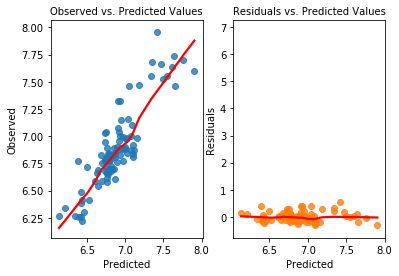

In [415]:
linearity_test(model, Y)

In [98]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Тест Рамсея по неизвестной причине показывает ошибку                                                                  #
#------------------------------------------------------------------------------------------------------------------------------#


sm.stats.diagnostic.linear_reset(model)

AttributeError: module 'statsmodels.stats.diagnostic' has no attribute 'linear_reset'

In [89]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                       Проверка предпосылки о нулевом математическом ожидании остатков                                                                   #
#------------------------------------------------------------------------------------------------------------------------------#


model.resid.mean()

1.1463911149119142e-14

0.94977748724929

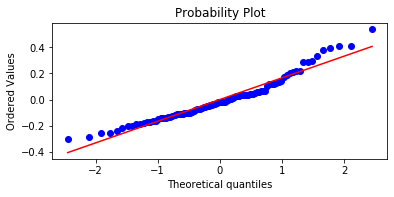

In [99]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Проерка на нормальность остатков                                                                   #
#------------------------------------------------------------------------------------------------------------------------------#


fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(model.resid, plot=ax, fit=True)
r**2

In [100]:
shapiro_test = stats.shapiro(model.resid)
shapiro_test

(0.949722945690155, 0.000980587094090879)

In [101]:
jb = stats.jarque_bera(model.resid)
jb

(13.916575847387596, 0.0009507228920910826)

In [102]:
new_data_US

,ln_retail_volumes,VIX,Cost_to_trade,Unempl,GDP,Fin_lit,Marg_Trade,Return,Infl,Int_rate,Deriv,ln_Deriv,ln_Cost_to_trade,ln_VIX
0,7.70,30.24,57.298827,0.06,0.065,1.0,1.0,0.02,0.0043,0.0007,2894627.0,14.878367,4.048280,3.409166
1,7.74,26.97,30.763334,0.06,0.065,1.0,1.0,0.01,0.0055,0.0008,2894627.0,14.878367,3.426324,3.294725
2,7.66,20.77,292.081489,0.07,0.043,1.0,1.0,0.10,0.0009,0.0009,2696624.0,14.807511,5.677033,3.033510
3,7.60,37.13,0.880000,0.07,0.043,1.0,1.0,-0.02,-0.0006,0.0009,2879377.0,14.873085,-0.127833,3.614425
4,7.53,26.70,0.880000,0.07,0.043,1.0,1.0,-0.04,0.0004,0.0009,2203521.0,14.605567,-0.127833,3.284664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,6.41,16.28,109.241853,0.08,0.005,0.0,0.0,0.04,0.0024,0.0009,3082222.0,14.941161,4.693564,2.789937
93,6.41,14.49,40.404460,0.08,0.005,0.0,0.0,0.01,0.0018,0.0009,2643380.0,14.787569,3.698940,2.673459
94,6.39,13.58,87.258584,0.08,0.005,0.0,0.0,0.03,-0.0010,0.0011,2568009.0,14.758641,4.468876,2.608598
95,6.22,15.36,10.957551,0.08,0.036,0.0,0.0,0.00,0.0026,0.0015,3351551.0,15.024934,2.394029,2.731767


In [4]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Загрузка датафрейма c удаленными выбросами                                                                #
#------------------------------------------------------------------------------------------------------------------------------#


dataset_US_w_outliers = pd.read_csv(r"C:\Users\peter\OneDrive\Документы\ВКР\ВКР работа\Dataset_USA_without_outliers.csv", delimiter = ';', decimal = ',')
dataset_US_w_outliers = pd.DataFrame(dataset_US_w_outliers)
dataset_US_w_outliers

,Date,Overall Traded volume USA -dollars,PartRate,Retail volumes -dollars,Retail volumes -billion dollars,ln (Retail volumes),VIX,Unemployment rate,Index Return,Fin Literacy,...,After Capital Gain tax,After Capital Gain tax total,Dividends monthly,Dividend tax,After Dividend tax,Total Gain,Comission (for trading),Comissions paid,Comissions paid total,Cost To Trade total
0,01.02.2021,1.135070e+13,"19,50%",2.213380e+12,2213.38,7.70,30.24,0.06,0.02,1,...,56.418827,56.418827,4,0.88,3.12,59.538827,"0,00%",0.000000,0.000000,57.298827
1,04.01.2021,1.179530e+13,"19,50%",2.300080e+12,2300.08,7.74,26.97,0.06,0.01,1,...,29.883334,29.883334,4,0.88,3.12,33.003334,"0,00%",0.000000,0.000000,30.763334
2,01.12.2020,1.091670e+13,"19,50%",2.128750e+12,2128.75,7.66,20.77,0.07,0.10,1,...,291.201489,291.201489,4,0.88,3.12,294.321489,"0,00%",0.000000,0.000000,292.081489
3,02.11.2020,1.026410e+13,"19,50%",2.001500e+12,2001.50,7.60,37.13,0.07,-0.02,1,...,-60.744020,0.000000,4,0.88,3.12,-57.624020,"0,00%",0.000000,0.000000,0.880000
4,01.10.2020,9.523330e+12,"19,50%",1.857050e+12,1857.05,7.53,26.70,0.07,-0.04,1,...,-121.639807,0.000000,4,0.88,3.12,-118.519807,"0,00%",0.000000,0.000000,0.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,03.06.2013,5.077340e+12,"12,00%",6.092810e+11,609.28,6.41,16.28,0.08,0.04,0,...,103.161765,103.161765,4,0.76,3.24,106.401765,"5,00%",5.320088,5.320088,109.241853
79,01.05.2013,5.049740e+12,"12,00%",6.059690e+11,605.97,6.41,14.49,0.08,0.01,0,...,37.602343,37.602343,4,0.76,3.24,40.842343,"5,00%",2.042117,2.042117,40.404460
80,01.04.2013,4.980840e+12,"12,00%",5.977010e+11,597.70,6.39,13.58,0.08,0.03,0,...,82.225318,82.225318,4,0.76,3.24,85.465318,"5,00%",4.273266,4.273266,87.258584
81,01.03.2013,4.205200e+12,"12,00%",5.046240e+11,504.62,6.22,15.36,0.08,0.00,0,...,9.557668,9.557668,4,0.76,3.24,12.797668,"5,00%",0.639883,0.639883,10.957551


In [5]:
Cost_to_trade_w_o = dataset_US_w_outliers["Cost To Trade total"]
Fin_lit_w_o = dataset_US_w_outliers["Fin Literacy"]
Infl_w_o = dataset_US_w_outliers["Infl"]
Int_rate_w_o = dataset_US_w_outliers["Int rate"]
Deriv_w_o = dataset_US_w_outliers["Der Turnover"]
GDP_w_o = dataset_US_w_outliers["GDP growth"]
Marg_Trade_w_o = dataset_US_w_outliers["Marginal Trading"]
Return_w_o = dataset_US_w_outliers["Index Return"]
Unempl_w_o = dataset_US_w_outliers["Unemployment rate"]
VIX_w_o = dataset_US_w_outliers["VIX"]
ln_retail_volumes_w_o = dataset_US_w_outliers["ln (Retail volumes)"]

In [6]:
series_1_w_o = pd.Series([ln_retail_volumes_w_o, Return_w_o, Unempl_w_o, VIX_w_o, Marg_Trade_w_o, GDP_w_o, Deriv_w_o, Infl_w_o, Int_rate_w_o, Fin_lit_w_o, Cost_to_trade_w_o])

In [7]:
frame_1_w_o = {'ln_retail_volumes' : ln_retail_volumes_w_o, 'VIX' : VIX_w_o, 'Cost_to_trade' : Cost_to_trade_w_o, 'Unempl' : Unempl_w_o, 
        'GDP' : GDP_w_o, 'Fin_lit' : Fin_lit_w_o, 'Marg_Trade' : Marg_Trade_w_o, 'Return' : Return_w_o, 'Infl' : Infl_w_o, 'Int_rate' : Int_rate_w_o,
         'Deriv' : Deriv_w_o}
new_data_US_w_o = pd.DataFrame(frame_1_w_o)
new_data_US_w_o

,ln_retail_volumes,VIX,Cost_to_trade,Unempl,GDP,Fin_lit,Marg_Trade,Return,Infl,Int_rate,Deriv
0,7.70,30.24,57.298827,0.06,0.065,1,1,0.02,0.0043,0.0007,2894627
1,7.74,26.97,30.763334,0.06,0.065,1,1,0.01,0.0055,0.0008,2894627
2,7.66,20.77,292.081489,0.07,0.043,1,1,0.10,0.0009,0.0009,2696624
3,7.60,37.13,0.880000,0.07,0.043,1,1,-0.02,-0.0006,0.0009,2879377
4,7.53,26.70,0.880000,0.07,0.043,1,1,-0.04,0.0004,0.0009,2203521
...,...,...,...,...,...,...,...,...,...,...,...
78,6.41,16.28,109.241853,0.08,0.005,0,0,0.04,0.0024,0.0009,3082222
79,6.41,14.49,40.404460,0.08,0.005,0,0,0.01,0.0018,0.0009,2643380
80,6.39,13.58,87.258584,0.08,0.005,0,0,0.03,-0.0010,0.0011,2568009
81,6.22,15.36,10.957551,0.08,0.036,0,0,0.00,0.0026,0.0015,3351551


In [29]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Построение модели для США с удаленными выбросами                                                                #
#------------------------------------------------------------------------------------------------------------------------------#


Y_w_o = new_data_US_w_o['ln_retail_volumes'] 
X_w_o = new_data_US_w_o[['VIX', 'Cost_to_trade', 'GDP', 'Fin_lit', 'Marg_Trade', 'Return', 'Infl', 'Int_rate',
         'Deriv', 'Unempl']]
X_w_o = sm.add_constant(X_w_o)

model_w_o = sm.OLS(Y_w_o, X_w_o).fit()
predictions = model_w_o.predict(X_w_o)
model_w_o.summary()

C:\Users\peter\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_retail_volumes   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     45.11
Date:                Fri, 30 Apr 2021   Prob (F-statistic):           5.08e-27
Time:                        11:19:42   Log-Likelihood:                 63.949
No. Observations:                  83   AIC:                            -105.9
Df Residuals:                      72   BIC:                            -79.29
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.8277      0.227     30.081      0.000       6.375       7.280
VIX               0.0105      0.005      2.014      0.048       0.000       0.021
Cost_to_trade    -0.0003      0.000     -0.512      0.610      -0.001       0.001
GDP              -4.5930      0.858     -5.355      0.000      -6.303      -2.883
Fin_lit           0.2074      0.084      2.461      0.016       0.039       0.375
Marg_Trade        1.0006      0.118      8.499      0.000       0.766       1.235
Return            0.4315      1.034      0.417      0.678      -1.631       2.494
Infl              2.3086      4.939      0.467      0.642      -7.537      12.154
Int_rate          4.5938      3.333      1.378      0.172      -2.051      11.239
Deriv          1.203e-08   1.45e-08      0.833      0.408   -1.68e-08    4.08e-08
Unempl           -7.2526      3.004     -2.414      0.018     -13.241      -1.264
==============================================================================
Omnibus:                        5.849   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.501
Skew:                           0.628   Prob(JB):                       0.0639
Kurtosis:                       3.113   Cond. No.                     1.86e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

0.9688628075915748

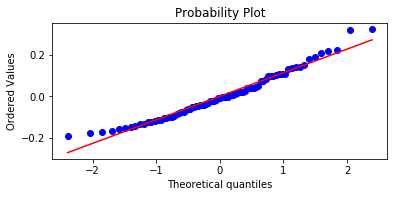

In [30]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Проверка на нормальность                                                                  #
#------------------------------------------------------------------------------------------------------------------------------#


shapiro_test_w_o = stats.shapiro(model_w_o.resid)
shapiro_test_w_o
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(model_w_o.resid, plot=ax, fit=True)
r**2

In [31]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Проверка на гетероскедастичность                                                                   #
#------------------------------------------------------------------------------------------------------------------------------#


def homoscedasticity_test(model):
    
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  2.553897
p-value                        0.990067
f-value                        0.228576
f p-value                      0.992597

 Goldfeld-Quandt test ----
                value
F statistic  0.854436
p-value      0.668443

 Residuals plots ----


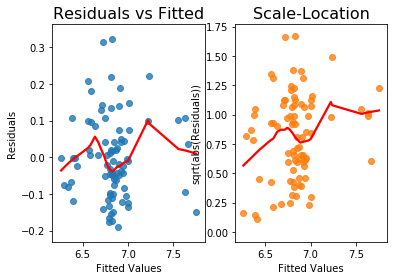

In [32]:
homoscedasticity_test(model_w_o)

In [25]:
white_test_w_o = pd.DataFrame(sms.het_white(model_w_o.resid, model_w_o.model.exog), 
                           columns=['value'],
                           index=['LM statistic', 'p-value', 'f-value', 'f p-value'])
print(white_test_w_o)

AssertionError: 

In [35]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Построение регрессии для США со стандартными ошибками в форме Уайта                                                                 #
#------------------------------------------------------------------------------------------------------------------------------#

Y_w_o = new_data_US_w_o['ln_retail_volumes'] 
X_w_o = new_data_US_w_o[['VIX', 'Cost_to_trade', 'GDP', 'Fin_lit', 'Marg_Trade', 'Return', 'Infl', 'Int_rate',
         'Deriv', 'Unempl']]
X_w_o = sm.add_constant(X_w_o)

model_w_o = sm.OLS(Y_w_o, X_w_o).fit(cov_type='HC0')
predictions = model_w_o.predict(X_w_o)
model_w_o.summary()

C:\Users\peter\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\peter\Anaconda3\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_retail_volumes   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     82.31
Date:                Fri, 30 Apr 2021   Prob (F-statistic):           2.76e-34
Time:                        11:20:32   Log-Likelihood:                 63.949
No. Observations:                  83   AIC:                            -105.9
Df Residuals:                      72   BIC:                            -79.29
Df Model:                          10                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.8277      0.202     33.818      0.000       6.432       7.223
VIX               0.0105      0.005      2.216      0.027       0.001       0.020
Cost_to_trade    -0.0003      0.000     -0.528      0.598      -0.001       0.001
GDP              -4.5930      1.031     -4.457      0.000      -6.613      -2.573
Fin_lit           0.2074      0.084      2.462      0.014       0.042       0.372
Marg_Trade        1.0006      0.112      8.895      0.000       0.780       1.221
Return            0.4315      0.956      0.451      0.652      -1.443       2.306
Infl              2.3086      4.960      0.465      0.642      -7.413      12.030
Int_rate          4.5938      2.913      1.577      0.115      -1.116      10.304
Deriv          1.203e-08   1.35e-08      0.893      0.372   -1.44e-08    3.84e-08
Unempl           -7.2526      2.714     -2.672      0.008     -12.572      -1.933
==============================================================================
Omnibus:                        5.849   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.501
Skew:                           0.628   Prob(JB):                       0.0639
Kurtosis:                       3.113   Cond. No.                     1.86e+09
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
shapiro_test = stats.shapiro(model_w_o.resid)
shapiro_test

(0.9662619829177856, 0.02805459313094616)

In [426]:
Y_w_o = new_data_US_w_o['ln_retail_volumes'] 
X_w_o = new_data_US_w_o[['VIX', 'Cost_to_trade', 'GDP', 'Fin_lit', 'Marg_Trade', 'Return', 'Infl', 'Int_rate',
         'Deriv', 'Unempl']]
X_w_o = sm.add_constant(X_w_o)

model_w_o = sm.OLS(Y_w_o, X_w_o).fit(cov_type='HC0')
predictions = model_w_o.predict(X_w_o)
model_w_o.summary()

C:\Users\peter\Anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_retail_volumes   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     82.31
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           2.76e-34
Time:                        19:34:39   Log-Likelihood:                 63.949
No. Observations:                  83   AIC:                            -105.9
Df Residuals:                      72   BIC:                            -79.29
Df Model:                          10                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.8277      0.202     33.818      0.000       6.432       7.223
VIX               0.0105      0.005      2.216      0.027       0.001       0.020
Cost_to_trade    -0.0003      0.000     -0.528      0.598      -0.001       0.001
GDP              -4.5930      1.031     -4.457      0.000      -6.613      -2.573
Fin_lit           0.2074      0.084      2.462      0.014       0.042       0.372
Marg_Trade        1.0006      0.112      8.895      0.000       0.780       1.221
Return            0.4315      0.956      0.451      0.652      -1.443       2.306
Infl              2.3086      4.960      0.465      0.642      -7.413      12.030
Int_rate          4.5938      2.913      1.577      0.115      -1.116      10.304
Deriv          1.203e-08   1.35e-08      0.893      0.372   -1.44e-08    3.84e-08
Unempl           -7.2526      2.714     -2.672      0.008     -12.572      -1.933
==============================================================================
Omnibus:                        5.849   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.501
Skew:                           0.628   Prob(JB):                       0.0639
Kurtosis:                       3.113   Cond. No.                     1.86e+09
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [299]:
shapiro_test_w_o = stats.shapiro(model_w_o.resid)
shapiro_test_w_o

(0.9662619829177856, 0.02805459313094616)

In [37]:
vif_w_o = pd.DataFrame()
vif_w_o["VIF Factor"] = [variance_inflation_factor(X_w_o.values, i) for i in range(X_w_o.shape[1])]
vif_w_o["features"] = X_w_o.columns
vif_w_o

,VIF Factor,features
0,295.791372,const
1,3.394636,VIX
2,5.790186,Cost_to_trade
3,1.449302,GDP
4,4.687804,Fin_lit
5,4.504948,Marg_Trade
6,6.615761,Return
7,1.058133,Infl
8,4.111579,Int_rate
9,2.456340,Deriv


C:\Users\peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


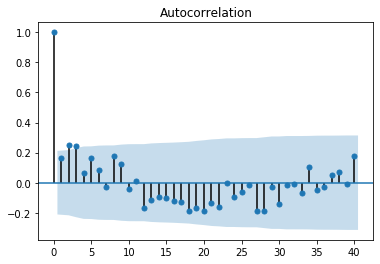

In [189]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Проверка на автокорреляцию в остатках                                                            #
#------------------------------------------------------------------------------------------------------------------------------#

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model_w_o.resid, lags=40 , alpha=0.05)
acf.show()

In [190]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Проверка на корреляцию между регрессороми и оишбками                                                                 #
#------------------------------------------------------------------------------------------------------------------------------#

from scipy.stats.stats import pearsonr

for column in X_w_o.columns:
    corr_test = pearsonr(X_w_o[column], model_w_o.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')


Variable: const --- correlation: nan, p-value: nan
Variable: VIX --- correlation: -0.0000, p-value: 1.0000
Variable: Cost_to_trade --- correlation: -0.0000, p-value: 1.0000
Variable: GDP --- correlation: 0.0000, p-value: 1.0000
Variable: Fin_lit --- correlation: 0.0000, p-value: 1.0000
Variable: Marg_Trade --- correlation: -0.0000, p-value: 1.0000
Variable: Return --- correlation: -0.0000, p-value: 1.0000
Variable: Infl --- correlation: -0.0000, p-value: 1.0000
Variable: Int_rate --- correlation: -0.0000, p-value: 1.0000
Variable: Deriv --- correlation: 0.0000, p-value: 1.0000
Variable: Unempl --- correlation: 0.0000, p-value: 1.0000


C:\Users\peter\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


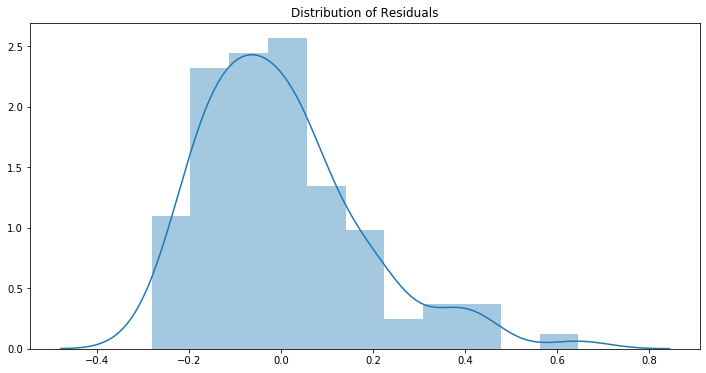

In [421]:
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(model.resid)
plt.show()

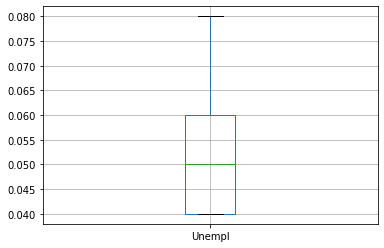

In [192]:
new_data_US_w_o.boxplot(column=['Unempl'])

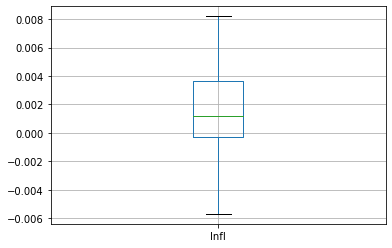

In [193]:
new_data_US_w_o.boxplot(column=['Infl'])

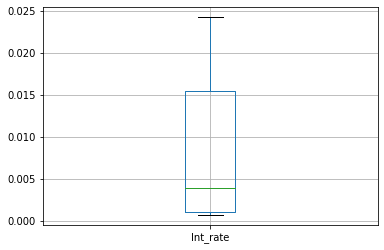

In [194]:
new_data_US_w_o.boxplot(column=['Int_rate'])

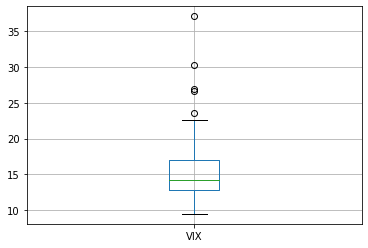

In [290]:
new_data_US_w_o.boxplot(column=['VIX'])

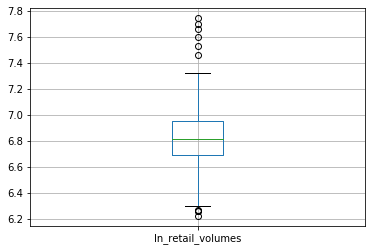

In [293]:
new_data_US_w_o.boxplot(column=['ln_retail_volumes'])

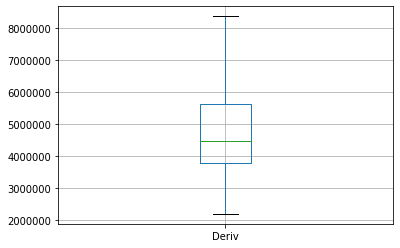

In [291]:
new_data_US_w_o.boxplot(column=['Deriv'])

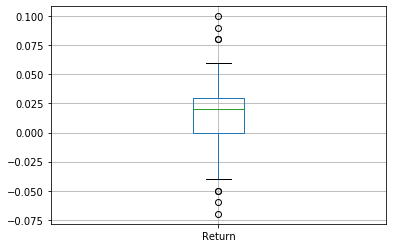

In [292]:
new_data_US_w_o.boxplot(column=['Return'])

In [303]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Загрузка датафрейма Германия                                                                  #
#------------------------------------------------------------------------------------------------------------------------------#


dataset_ger = pd.read_csv(r"C:\Users\peter\OneDrive\Документы\ВКР\ВКР работа\Dataset_Germany.csv", delimiter = ';', decimal = ',')
dataset_ger = pd.DataFrame(dataset_ger)
dataset_ger = dataset_ger.drop (dataset_ger.tail (1) .index)
dataset_ger

,Date,Households position - mln euro,Retail volumes - bln euro,ln (Retail volumes),V1XI,Unemployment rate,Index Return,Fin Literacy,Marginal Trading,CMU,...,After Capital Gain tax,After Capital Gain tax total,Dividends monthly,Dividend tax,After Dividend tax,Total Gain,Comission (for trading),Comissions paid,Comissions paid total,Cost To Trade total
0,01.02.2021,1275063.0,1275.06,7.15,34.83,0.060,-0.023,1.0,1.0,1.0,...,-67.209764,0.000000,7.00,1.75,5.25,-61.959764,"0,00%",0.000000,0.00000,1.750000
1,04.01.2021,1275063.0,1275.06,7.15,32.66,0.060,0.043,1.0,1.0,1.0,...,125.900661,125.900661,7.00,1.75,5.25,131.150660,"0,00%",0.000000,0.00000,127.650661
2,01.12.2020,1251330.0,1251.33,7.13,28.18,0.061,0.162,1.0,1.0,1.0,...,479.699886,479.699886,7.00,1.75,5.25,484.949886,"0,00%",0.000000,0.00000,481.449886
3,02.11.2020,1225822.0,1225.82,7.11,43.54,0.061,-0.087,1.0,1.0,1.0,...,-257.305951,0.000000,7.00,1.75,5.25,-252.055951,"0,00%",0.000000,0.00000,1.750000
4,01.10.2020,1123552.0,1123.55,7.02,32.54,0.062,-0.035,1.0,1.0,1.0,...,-103.329407,0.000000,7.00,1.75,5.25,-98.079407,"0,00%",0.000000,0.00000,1.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,03.06.2013,765647.0,765.65,6.64,27.58,0.068,0.010,0.0,0.0,0.0,...,29.600000,29.600000,5.48,1.37,4.11,33.710000,"5,00%",1.685500,1.68550,32.655500
93,01.05.2013,790333.0,790.33,6.67,22.04,0.069,0.010,0.0,0.0,0.0,...,29.600000,29.600000,5.48,1.37,4.11,33.710000,"5,00%",1.685500,1.68550,32.655500
94,01.04.2013,784766.0,784.77,6.67,20.02,0.070,0.010,0.0,0.0,0.0,...,29.600000,29.600000,5.48,1.37,4.11,33.710000,"5,00%",1.685500,1.68550,32.655500
95,01.03.2013,781795.0,781.80,6.66,23.69,0.069,-0.063,0.0,0.0,0.0,...,-187.124433,0.000000,5.48,1.37,4.11,-183.014433,"5,00%",-9.150722,5.00000,6.370000


In [304]:
Cost_to_trade_Gr = dataset_ger["Cost To Trade total"]
ln_retail_volumes_Gr = dataset_ger["ln (Retail volumes)"]
V1XI = dataset_ger["V1XI"]
Unempl_Gr = dataset_ger["Unemployment rate"]
Infl_Gr = dataset_ger["Infl"]
Int_rate_Gr = dataset_ger["Int rate"]
Deriv_Gr = dataset_ger["Der Turnover (mln dollars)"]
GDP_Gr = dataset_ger["GDP growth"]
CMU = dataset_ger["CMU"]
Fin_lit_Gr = dataset_ger["Fin Literacy"]
Marg_trade_Gr = dataset_ger["Marginal Trading"]
Return_Gr = dataset_ger["Index Return"]

In [305]:
series_2 = pd.Series([ln_retail_volumes_Gr, Return_Gr, Unempl_Gr, V1XI, Marg_trade_Gr, GDP_Gr, Deriv_Gr, Infl_Gr, Int_rate_Gr, CMU, Fin_lit_Gr, Cost_to_trade_Gr, CMU])

In [313]:
frame2 = {'ln_retail_volumes' : ln_retail_volumes_Gr, 'V1XI' : V1XI, 'Cost_to_trade' : Cost_to_trade_Gr, 'Unempl' : Unempl_Gr, 
        'GDP' : GDP_Gr, 'Fin_lit' : Fin_lit_Gr, 'Marg_trade' : Marg_trade_Gr, 'Return' : Return_Gr, 'Infl' : Infl, 'Int_rate' : Int_rate_Gr,
         'Deriv' : Deriv_Gr, "CMU" : CMU}

In [319]:
new_data_Gr = pd.DataFrame(frame2)
new_data_Gr

,ln_retail_volumes,V1XI,Cost_to_trade,Unempl,GDP,Fin_lit,Marg_trade,Return,Infl,Int_rate,Deriv,CMU
0,7.15,34.83,1.750000,0.060,-0.015,1.0,1.0,-0.023,0.0043,0.0000,1057729.0,1.0
1,7.15,32.66,127.650661,0.060,-0.015,1.0,1.0,0.043,0.0055,0.0000,976140.0,1.0
2,7.13,28.18,481.449886,0.061,0.003,1.0,1.0,0.162,0.0009,0.0000,1035280.0,1.0
3,7.11,43.54,1.750000,0.061,0.003,1.0,1.0,-0.087,-0.0006,0.0000,1221809.0,1.0
4,7.02,32.54,1.750000,0.062,0.003,1.0,1.0,-0.035,0.0004,0.0000,930653.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
92,6.64,27.58,32.655500,0.068,0.008,0.0,0.0,0.010,0.0024,0.0050,1840827.0,0.0
93,6.67,22.04,32.655500,0.069,0.008,0.0,0.0,0.010,0.0018,0.0050,2484611.0,0.0
94,6.67,20.02,32.655500,0.070,0.008,0.0,0.0,0.010,-0.0010,0.0075,2729727.0,0.0
95,6.66,23.69,6.370000,0.069,-0.015,0.0,0.0,-0.063,0.0026,0.0075,3322906.0,0.0


In [328]:
Y_Gr = new_data_Gr['ln_retail_volumes'] 
X_Gr = new_data_Gr[['V1XI', 'Cost_to_trade', 'Unempl', 'GDP', 'Fin_lit', 'Marg_trade', 'Return', 'Infl', 'Int_rate',
         'Deriv', 'CMU']]

X_Gr = sm.add_constant(X_Gr)
model_Gr = sm.OLS(Y_Gr, X_Gr).fit()
predictions = model_Gr.predict(X_Gr)
model_Gr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_retail_volumes   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     44.79
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           1.14e-30
Time:                        00:26:57   Log-Likelihood:                 154.34
No. Observations:                  97   AIC:                            -284.7
Df Residuals:                      85   BIC:                            -253.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4434      0.099     75.115      0.000       7.246       7.640
V1XI              0.0050      0.001      3.517      0.001       0.002       0.008
Cost_to_trade    -0.0001      0.000     -1.017      0.312      -0.000       0.000
Unempl          -12.8728      1.498     -8.596      0.000     -15.850      -9.895
GDP              -0.2835      0.254     -1.117      0.267      -0.788       0.221
Fin_lit           0.0579      0.032      1.783      0.078      -0.007       0.122
Marg_trade        0.2208      0.026      8.629      0.000       0.170       0.272
Return            0.6581      0.243      2.710      0.008       0.175       1.141
Infl              3.0443      2.195      1.387      0.169      -1.319       7.408
Int_rate         -8.3666      8.153     -1.026      0.308     -24.577       7.843
Deriv           1.18e-08    1.8e-08      0.656      0.514    -2.4e-08    4.76e-08
CMU              -0.0141      0.019     -0.745      0.458      -0.052       0.023
==============================================================================
Omnibus:                       20.614   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.472
Skew:                           0.860   Prob(JB):                     1.20e-08
Kurtosis:                       5.463   Cond. No.                     2.20e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [321]:
vif_Gr = pd.DataFrame()
vif_Gr["VIF Factor"] = [variance_inflation_factor(X_Gr.values, i) for i in range(X_Gr.shape[1])]
vif_Gr["features"] = X_Gr.columns
vif_Gr

,VIF Factor,features
0,343.582785,const
1,3.777858,V1XI
2,3.754998,Cost_to_trade
3,3.351818,Unempl
4,1.278876,GDP
5,5.327119,Fin_lit
6,1.329800,Marg_trade
7,5.938297,Return
8,1.390534,Infl
9,7.237853,Int_rate


In [322]:
ln_Deriv_Gr = np.log(Deriv_Gr)
ln_V1XI = np.log(V1XI)
ln_Cost_to_trade_Gr = np.log(Cost_to_trade_Gr)

In [326]:
new_data_Gr['ln_Deriv'] = ln_Deriv_Gr
new_data_Gr['ln_Cost_to_trade'] = ln_Cost_to_trade_Gr
new_data_Gr['ln_V1XI'] = ln_V1XI
new_data_Gr

,ln_retail_volumes,V1XI,Cost_to_trade,Unempl,GDP,Fin_lit,Marg_trade,Return,Infl,Int_rate,Deriv,CMU,ln_Deriv,ln_Cost_to_trade,ln_VIXI,ln_V1XI
0,7.15,34.83,1.750000,0.060,-0.015,1.0,1.0,-0.023,0.0043,0.0000,1057729.0,1.0,13.871635,0.559616,3.550479,3.550479
1,7.15,32.66,127.650661,0.060,-0.015,1.0,1.0,0.043,0.0055,0.0000,976140.0,1.0,13.791361,4.849297,3.486151,3.486151
2,7.13,28.18,481.449886,0.061,0.003,1.0,1.0,0.162,0.0009,0.0000,1035280.0,1.0,13.850182,6.176802,3.338613,3.338613
3,7.11,43.54,1.750000,0.061,0.003,1.0,1.0,-0.087,-0.0006,0.0000,1221809.0,1.0,14.015843,0.559616,3.773680,3.773680
4,7.02,32.54,1.750000,0.062,0.003,1.0,1.0,-0.035,0.0004,0.0000,930653.0,1.0,13.743642,0.559616,3.482470,3.482470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,6.64,27.58,32.655500,0.068,0.008,0.0,0.0,0.010,0.0024,0.0050,1840827.0,0.0,14.425725,3.486013,3.317091,3.317091
93,6.67,22.04,32.655500,0.069,0.008,0.0,0.0,0.010,0.0018,0.0050,2484611.0,0.0,14.725627,3.486013,3.092859,3.092859
94,6.67,20.02,32.655500,0.070,0.008,0.0,0.0,0.010,-0.0010,0.0075,2729727.0,0.0,14.819712,3.486013,2.996732,2.996732
95,6.66,23.69,6.370000,0.069,-0.015,0.0,0.0,-0.063,0.0026,0.0075,3322906.0,0.0,15.016350,1.851599,3.165053,3.165053


In [327]:
Y_Gr = new_data_Gr['ln_retail_volumes'] 
X_Gr = new_data_Gr[['ln_V1XI', 'ln_Cost_to_trade', 'Unempl', 'GDP', 'Fin_lit', 'Marg_trade', 'Return', 'Infl', 'Int_rate',
         'ln_Deriv', 'CMU']]

X_Gr = sm.add_constant(X_Gr)
model_Gr = sm.OLS(Y_Gr, X_Gr).fit()
predictions = model_Gr.predict(X_Gr)
model_Gr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_retail_volumes   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     40.23
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           5.02e-29
Time:                        00:26:16   Log-Likelihood:                 149.94
No. Observations:                  97   AIC:                            -275.9
Df Residuals:                      85   BIC:                            -245.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.9419      0.372     18.661      0.000       6.202       7.682
ln_V1XI              0.0669      0.036      1.860      0.066      -0.005       0.138
ln_Cost_to_trade     0.0012      0.008      0.162      0.872      -0.014       0.016
Unempl             -11.9044      1.540     -7.730      0.000     -14.966      -8.843
GDP                 -0.3859      0.262     -1.471      0.145      -0.907       0.136
Fin_lit              0.0536      0.034      1.571      0.120      -0.014       0.121
Marg_trade           0.2346      0.028      8.529      0.000       0.180       0.289
Return               0.3107      0.240      1.293      0.200      -0.167       0.788
Infl                 3.6431      2.140      1.703      0.092      -0.611       7.898
Int_rate           -11.0827      7.448     -1.488      0.140     -25.892       3.726
ln_Deriv             0.0254      0.025      1.035      0.304      -0.023       0.074
CMU                  0.0015      0.021      0.071      0.943      -0.039       0.042
==============================================================================
Omnibus:                       35.240   Durbin-Watson:                   0.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.087
Skew:                           1.299   Prob(JB):                     7.45e-20
Kurtosis:                       6.879   Cond. No.                     1.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [329]:
shapiro_test_Gr = stats.shapiro(model_Gr.resid)
shapiro_test_Gr

(0.9516411423683167, 0.001306660007685423)

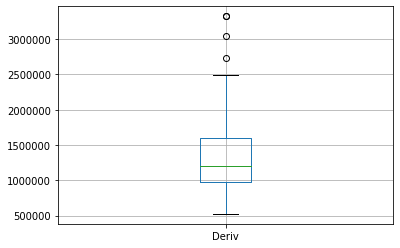

In [330]:
new_data_Gr.boxplot(column=['Deriv'])

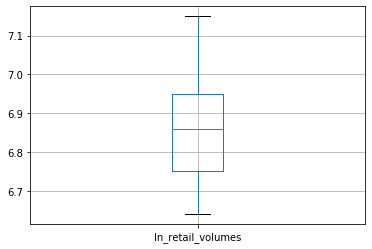

In [331]:
new_data_Gr.boxplot(column=['ln_retail_volumes'])

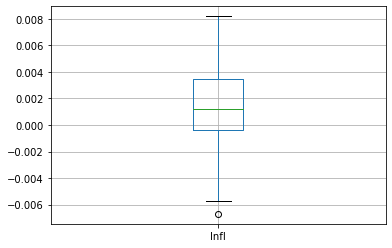

In [332]:
new_data_Gr.boxplot(column=['Infl'])

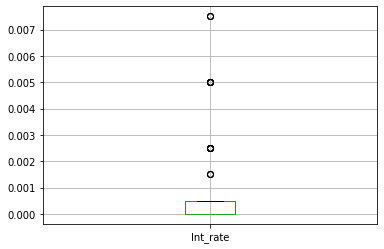

In [333]:
new_data_Gr.boxplot(column=['Int_rate'])

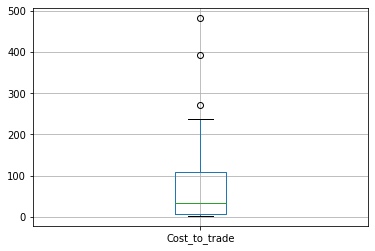

In [334]:
new_data_Gr.boxplot(column=['Cost_to_trade'])

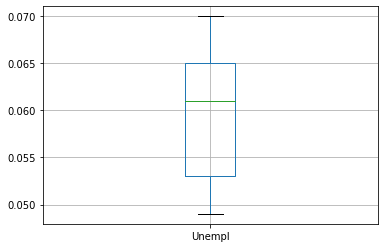

In [335]:
new_data_Gr.boxplot(column=['Unempl'])

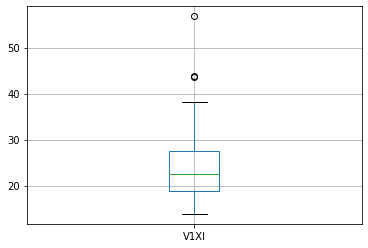

In [336]:
new_data_Gr.boxplot(column=['V1XI'])

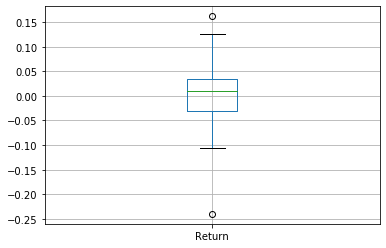

In [337]:
new_data_Gr.boxplot(column=['Return'])

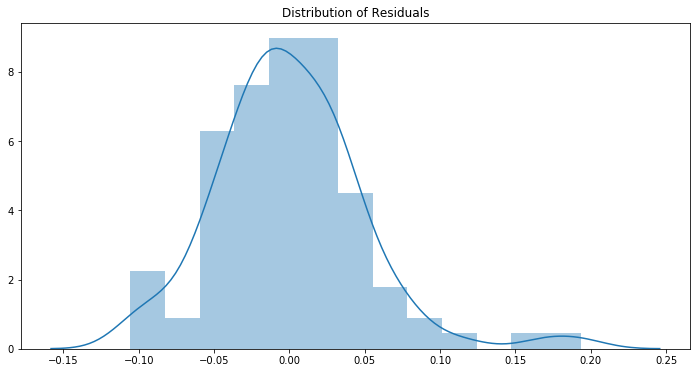

In [338]:
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(model_Gr.resid)
plt.show()

In [339]:
for column in X_Gr.columns:
    corr_test = pearsonr(X_Gr[column], model_Gr.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')


Variable: const --- correlation: nan, p-value: nan
Variable: V1XI --- correlation: -0.0000, p-value: 1.0000
Variable: Cost_to_trade --- correlation: -0.0000, p-value: 1.0000
Variable: Unempl --- correlation: 0.0000, p-value: 1.0000
Variable: GDP --- correlation: -0.0000, p-value: 1.0000
Variable: Fin_lit --- correlation: -0.0000, p-value: 1.0000
Variable: Marg_trade --- correlation: -0.0000, p-value: 1.0000
Variable: Return --- correlation: -0.0000, p-value: 1.0000
Variable: Infl --- correlation: 0.0000, p-value: 1.0000
Variable: Int_rate --- correlation: 0.0000, p-value: 1.0000
Variable: Deriv --- correlation: 0.0000, p-value: 1.0000
Variable: CMU --- correlation: -0.0000, p-value: 1.0000


C:\Users\peter\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())



 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  4.678498e+01
p-value                        2.347966e-06
f-value                        7.199445e+00
f p-value                      1.595494e-08

 Goldfeld-Quandt test ----
                value
F statistic  0.341965
p-value      0.999341

 Residuals plots ----


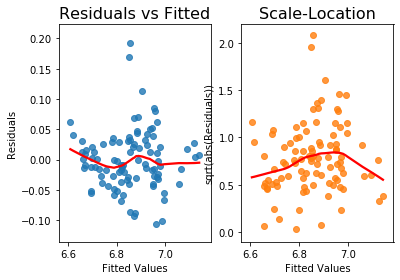

In [340]:
homoscedasticity_test(model_Gr)

In [436]:
white_test_Gr = pd.DataFrame(sms.het_white(model_Gr.resid, model_Gr.model.exog), 
                           columns=['value'],
                           index=['LM statistic', 'p-value', 'f-value', 'f p-value'])
print(white_test_Gr)

                     value
LM statistic  8.027352e+01
p-value       1.804447e-06
f-value       1.055821e+01
f p-value     1.699245e-15


In [344]:
Y_Gr = new_data_Gr['ln_retail_volumes'] 
X_Gr = new_data_Gr[['V1XI', 'Cost_to_trade', 'Unempl', 'GDP', 'Fin_lit', 'Marg_trade', 'Return', 'Infl', 'Int_rate',
         'Deriv', 'CMU']]

X_Gr = sm.add_constant(X_Gr)
model_Gr = sm.OLS(Y_Gr, X_Gr).fit(cov_type='HC0')
predictions = model_Gr.predict(X_Gr)
model_Gr.summary()

C:\Users\peter\Anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 10
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_retail_volumes   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     153.1
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           6.04e-50
Time:                        00:35:15   Log-Likelihood:                 154.34
No. Observations:                  97   AIC:                            -284.7
Df Residuals:                      85   BIC:                            -253.8
Df Model:                          11                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4434      0.099     75.395      0.000       7.250       7.637
V1XI              0.0050      0.002      2.260      0.024       0.001       0.009
Cost_to_trade    -0.0001      0.000     -0.970      0.332      -0.000       0.000
Unempl          -12.8728      1.551     -8.297      0.000     -15.914      -9.832
GDP              -0.2835      0.595     -0.477      0.634      -1.449       0.882
Fin_lit           0.0579      0.021      2.781      0.005       0.017       0.099
Marg_trade        0.2208      0.032      6.853      0.000       0.158       0.284
Return            0.6581      0.269      2.442      0.015       0.130       1.186
Infl              3.0443      2.103      1.448      0.148      -1.077       7.166
Int_rate         -8.3666      5.944     -1.408      0.159     -20.016       3.283
Deriv           1.18e-08   1.62e-08      0.729      0.466   -1.99e-08    4.35e-08
CMU              -0.0141      0.017     -0.824      0.410      -0.048       0.019
==============================================================================
Omnibus:                       20.614   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.472
Skew:                           0.860   Prob(JB):                     1.20e-08
Kurtosis:                       5.463   Cond. No.                     2.20e+09
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.2e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [345]:
shapiro_test_Gr = stats.shapiro(model_Gr.resid)
shapiro_test_Gr

(0.9516411423683167, 0.001306660007685423)

In [397]:
#------------------------------------------------------------------------------------------------------------------------------#
#                                        Загрузка датафрейма Германия без выбросов                                                                #
#------------------------------------------------------------------------------------------------------------------------------#


dataset_ger_w_o = pd.read_csv(r"C:\Users\peter\OneDrive\Документы\ВКР\ВКР работа\Dataset_Germany_without_outliers.csv", delimiter = ';', decimal = ',')
dataset_ger_w_o = pd.DataFrame(dataset_ger_w_o)
dataset_ger_w_o

,Date,Households position - mln euro,Retail volumes - bln euro,ln (Retail volumes),V1XI,Unemployment rate,Index Return,Fin Literacy,Marginal Trading,CMU,...,After Capital Gain tax,After Capital Gain tax total,Dividends monthly,Dividend tax,After Dividend tax,Total Gain,Comission (for trading),Comissions paid,Comissions paid total,Cost To Trade total
0,01.02.2021,1275063,1275.06,7.15,34.83,0.060,-0.023,1,1,1,...,-67.209764,0.000000,7.00,1.75,5.25,-61.959764,"0,00%",0.000000,0.000000,1.750000
1,04.01.2021,1275063,1275.06,7.15,32.66,0.060,0.043,1,1,1,...,125.900661,125.900661,7.00,1.75,5.25,131.150660,"0,00%",0.000000,0.000000,127.650661
2,02.11.2020,1225822,1225.82,7.11,43.54,0.061,-0.087,1,1,1,...,-257.305951,0.000000,7.00,1.75,5.25,-252.055951,"0,00%",0.000000,0.000000,1.750000
3,01.10.2020,1123552,1123.55,7.02,32.54,0.062,-0.035,1,1,1,...,-103.329407,0.000000,7.00,1.75,5.25,-98.079407,"0,00%",0.000000,0.000000,1.750000
4,01.09.2020,1155204,1155.20,7.05,33.50,0.063,0.041,1,1,1,...,121.867687,121.867687,7.00,1.75,5.25,127.117687,"0,00%",0.000000,0.000000,123.617687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,01.08.2013,767882,767.88,6.64,22.87,0.068,0.064,0,0,0,...,190.212653,190.212653,5.48,1.37,4.11,194.322653,"5,00%",9.716133,9.716133,201.298786
86,01.07.2013,776457,776.46,6.65,27.18,0.068,-0.039,0,0,0,...,-116.651251,0.000000,5.48,1.37,4.11,-112.541251,"5,00%",-5.627063,5.000000,6.370000
87,03.06.2013,765647,765.65,6.64,27.58,0.068,0.010,0,0,0,...,29.600000,29.600000,5.48,1.37,4.11,33.710000,"5,00%",1.685500,1.685500,32.655500
88,01.05.2013,790333,790.33,6.67,22.04,0.069,0.010,0,0,0,...,29.600000,29.600000,5.48,1.37,4.11,33.710000,"5,00%",1.685500,1.685500,32.655500


In [398]:
Cost_to_trade_Gr_w_o = dataset_ger_w_o["Cost To Trade total"]
ln_retail_volumes_Gr_w_o = dataset_ger_w_o["ln (Retail volumes)"]
V1XI_w_o = dataset_ger_w_o["V1XI"]
Unempl_Gr_w_o = dataset_ger_w_o["Unemployment rate"]
Infl_Gr_w_o = dataset_ger_w_o["Infl"]
Int_rate_Gr_w_o = dataset_ger_w_o["Int rate"]
Deriv_Gr_w_o = dataset_ger_w_o["Der Turnover (mln dollars)"]
GDP_Gr_w_o = dataset_ger_w_o["GDP growth"]
CMU_w_o = dataset_ger_w_o["CMU"]
Fin_lit_Gr_w_o = dataset_ger_w_o["Fin Literacy"]
Marg_trade_Gr_w_o = dataset_ger_w_o["Marginal Trading"]
Return_Gr_w_o = dataset_ger_w_o["Index Return"]

In [399]:
series_2 = pd.Series([ln_retail_volumes_Gr_w_o, Return_Gr_w_o, Unempl_Gr_w_o, V1XI_w_o, Marg_trade_Gr_w_o, GDP_Gr_w_o, Deriv_Gr_w_o, Infl_Gr_w_o, Int_rate_Gr_w_o, CMU_w_o, Fin_lit_Gr_w_o, Cost_to_trade_Gr_w_o, CMU_w_o])

In [400]:
frame2_w_o = {'ln_retail_volumes' : ln_retail_volumes_Gr_w_o, 'V1XI' : V1XI_w_o, 'Cost_to_trade' : Cost_to_trade_Gr_w_o, 'Unempl' : Unempl_Gr_w_o, 
        'GDP' : GDP_Gr_w_o, 'Fin_lit' : Fin_lit_Gr_w_o, 'Marg_trade' : Marg_trade_Gr_w_o, 'Return' : Return_Gr_w_o, 'Infl' : Infl_Gr_w_o, 'Int_rate' : Int_rate_Gr_w_o,
         'Deriv' : Deriv_Gr_w_o, "CMU" : CMU_w_o}

In [401]:
new_data_Gr_w_o = pd.DataFrame(frame2_w_o)
new_data_Gr_w_o

,ln_retail_volumes,V1XI,Cost_to_trade,Unempl,GDP,Fin_lit,Marg_trade,Return,Infl,Int_rate,Deriv,CMU
0,7.15,34.83,1.750000,0.060,-0.015,1,1,-0.023,0.0078,0.0000,1057729,1
1,7.15,32.66,127.650661,0.060,-0.015,1,1,0.043,0.0067,0.0000,976140,1
2,7.11,43.54,1.750000,0.061,0.003,1,1,-0.087,-0.0085,0.0000,1221809,1
3,7.02,32.54,1.750000,0.062,0.003,1,1,-0.035,0.0009,0.0000,930653,1
4,7.05,33.50,123.617687,0.063,0.085,1,1,0.041,-0.0019,0.0000,868791,1
...,...,...,...,...,...,...,...,...,...,...,...,...
85,6.64,22.87,201.298786,0.068,0.005,0,0,0.064,0.0000,0.0050,3042619,0
86,6.65,27.18,6.370000,0.068,0.005,0,0,-0.039,0.0047,0.0050,2450110,0
87,6.64,27.58,32.655500,0.068,0.008,0,0,0.010,0.0009,0.0050,1840827,0
88,6.67,22.04,32.655500,0.069,0.008,0,0,0.010,0.0038,0.0050,2484611,0


In [440]:
Y_Gr_w_o = new_data_Gr_w_o['ln_retail_volumes'] 
X_Gr_w_o = new_data_Gr_w_o[['V1XI', 'Cost_to_trade', 'Unempl', 'GDP', 'Fin_lit', 'Marg_trade', 'Return', 'Infl', 'Int_rate',
         'Deriv', 'CMU']]

X_Gr_w_o = sm.add_constant(X_Gr_w_o)
model_Gr_w_o = sm.OLS(Y_Gr_w_o, X_Gr_w_o).fit(cov_type='HC0')
predictions = model_Gr.predict(X_Gr_w_o)
model_Gr_w_o.summary()

C:\Users\peter\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\peter\Anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 10
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_retail_volumes   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     79.65
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           9.91e-37
Time:                        01:08:50   Log-Likelihood:                 160.15
No. Observations:                  90   AIC:                            -296.3
Df Residuals:                      78   BIC:                            -266.3
Df Model:                          11                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.7171      0.089     86.308      0.000       7.542       7.892
V1XI          -6.091e-05      0.002     -0.038      0.970      -0.003       0.003
Cost_to_trade -9.566e-05      0.000     -0.786      0.432      -0.000       0.000
Unempl          -14.7123      1.202    -12.244      0.000     -17.067     -12.357
GDP               1.4892      0.825      1.805      0.071      -0.127       3.106
Fin_lit           0.0069      0.018      0.378      0.705      -0.029       0.043
Marg_trade        0.2660      0.044      6.096      0.000       0.180       0.352
Return            0.4047      0.234      1.730      0.084      -0.054       0.863
Infl              0.2264      1.174      0.193      0.847      -2.074       2.527
Int_rate         -4.7538      5.044     -0.942      0.346     -14.640       5.132
Deriv         -1.174e-08   1.24e-08     -0.943      0.346   -3.61e-08    1.27e-08
CMU               0.0119      0.016      0.745      0.456      -0.019       0.043
==============================================================================
Omnibus:                        6.309   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.043   Jarque-Bera (JB):               10.455
Skew:                          -0.066   Prob(JB):                      0.00537
Kurtosis:                       4.664   Cond. No.                     2.27e+09
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.27e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [403]:
shapiro_test_Gr_w_o = stats.shapiro(model_Gr_w_o.resid)
shapiro_test_Gr_w_o

(0.9722070693969727, 0.05063571408390999)

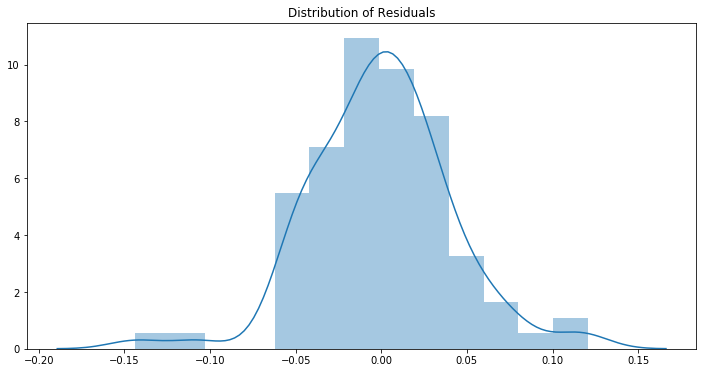

In [404]:
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(model_Gr_w_o.resid)
plt.show()

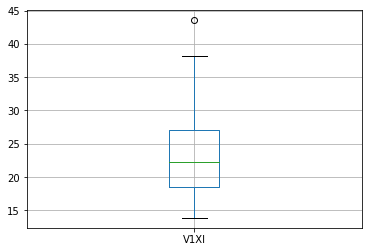

In [405]:
new_data_Gr_w_o.boxplot(column=['V1XI'])

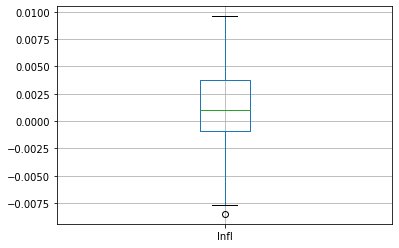

In [406]:
new_data_Gr_w_o.boxplot(column=['Infl'])

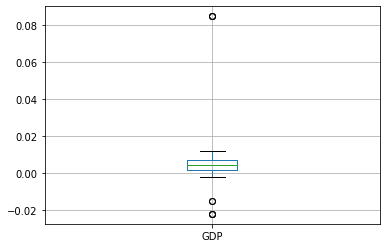

In [407]:
new_data_Gr_w_o.boxplot(column=['GDP'])

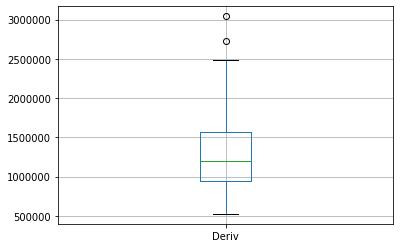

In [408]:
new_data_Gr_w_o.boxplot(column=['Deriv'])

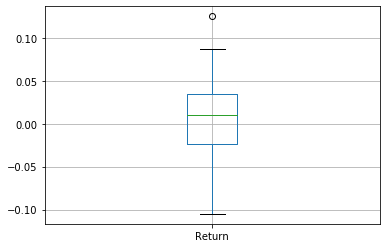

In [409]:
new_data_Gr_w_o.boxplot(column=['Return'])

C:\Users\peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


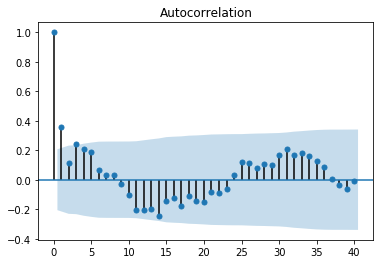

In [410]:
acf = smt.graphics.plot_acf(model_Gr_w_o.resid, lags=40 , alpha=0.05)
acf.show()

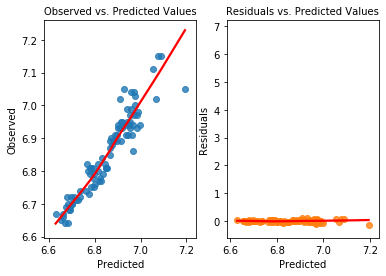

In [428]:
linearity_test(model_Gr_w_o, Y_Gr_w_o)

In [435]:
vif_Gr_w_o = pd.DataFrame()
vif_Gr_w_o["VIF Factor"] = [variance_inflation_factor(X_Gr_w_o.values, i) for i in range(X_Gr_w_o.shape[1])]
vif_Gr_w_o["features"] = X_Gr_w_o.columns
vif_Gr_w_o

,VIF Factor,features
0,373.389668,const
1,4.057876,V1XI
2,4.587697,Cost_to_trade
3,3.124165,Unempl
4,1.456291,GDP
5,5.520402,Fin_lit
6,1.425761,Marg_trade
7,6.301570,Return
8,1.208130,Infl
9,6.334929,Int_rate


0.9455545126415568

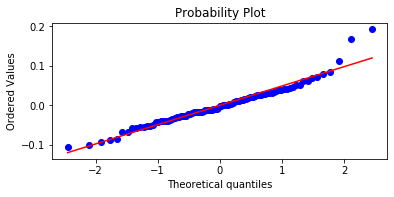

In [437]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(model_Gr.resid, plot=ax, fit=True)
r**2

0.963480038380818

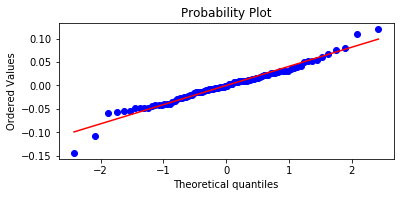

In [438]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(model_Gr_w_o.resid, plot=ax, fit=True)
r**2

In [439]:
jb = stats.jarque_bera(model_Gr.resid)
jb

(36.47246235761118, 1.2025563322914934e-08)